# Case Study 2 : Data Science in Financial Data

**Recommended Readings:** 
* [Quantopian Tutorials](https://www.quantopian.com/tutorials/) 
* Please register an account in [Quantopian online notebook system](https://www.quantopian.com/notebooks/).
* Upload this file into the system and start working on your idea.


**NOTE**
* Please download your code (notebook file as an ipynb file) and include it in your submission.


# Problem: pick a data science problem that you plan to solve using Stock Price Data
* The problem should be important and interesting, which has a potential impact in some area.
* The problem should be solvable using the data available and data science solutions.

Please briefly describe in the following cell: what problem are you trying to solve? why this problem is important and interesting?

In [ ]:

#Our problem focuses on tracking recession using Logistic Regression.
#Recession is a decline in economic growth lasting for a significant period of time usually 6 months or more. 
#During a recession, unemployment increases,industrial production decreases and a country's GDP falls down. 
#Hence it's important to track recessions and prepare well for any such circumstances happening in future.
#The recent recessions have occured in 1991,2001,2007-2008. 
# A recession is hard to classify but there are certain factors 
#such as market treasury yield rates, unemployment rate and stock prices 
#which can help identify a recession, sometimes even before it has occured.
#We will be using datasets from Quandl and Quantopian.com related to 
#market yields for three months and ten years, stock market prices and Unemployment rate. 
# we will then evaluate if Logistic Regression is able to find the probability of recession this year
# In the last part of our problem we will try to figure out if there are chances of a recession in the near future


# Data Collection/Processing: 

In [ ]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary


#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
#get the unemployement rate data for last 30 years
from odo import odo
from quantopian.interactive.data.quandl import fred_unrate
unrate_df = odo(fred_unrate, pd.DataFrame)
unrate_df = unrate_df.sort_values(by='asof_date', ascending=False)
unrate_df['asof_date']=unrate_df['asof_date'].dt.strftime('%Y-%m')
unrate_df=unrate_df.rename(columns={'asof_date':'Date','value':'Unemp_rate'})
unrate_df=unrate_df.drop(['timestamp'],axis=1)
print(unrate_df.head())


     Unemp_rate     Date
860         3.5  2019-09
859         3.7  2019-08
858         3.7  2019-07
857         3.7  2019-06
856         3.6  2019-05


In [ ]:
#Get U.S. treasury yield data for last 30 years
Yield_data = local_csv('USTREASURY-YIELD.csv', date_column='Date')
Yield_data = pd.DataFrame(Yield_data)
Yield_data = Yield_data.reset_index()
Yield_data['Date']=Yield_data['Date'].dt.strftime('%Y-%m')
Yield_data = Yield_data.groupby(['Date']).mean().reset_index()
Yield_data['3-10diff']=Yield_data['ThreeMO']-Yield_data['TenYR']
Yield_data['Y_curve']=np.where(Yield_data['3-10diff']>=0,1,0)
print(Yield_data.head(10))



      Date   ThreeMO     SixMO     TenYR  3-10diff  Y_curve
0  1990-01  7.898095  7.956190  8.206667 -0.308571        0
1  1990-02  8.002105  8.121053  8.473158 -0.471053        0
2  1990-03  8.170000  8.280000  8.588636 -0.418636        0
3  1990-04  8.040500  8.270000  8.785500 -0.745000        0
4  1990-05  8.006818  8.190909  8.758182 -0.751364        0
5  1990-06  7.986667  8.045238  8.480000 -0.493333        0
6  1990-07  7.874762  7.923333  8.471429 -0.596667        0
7  1990-08  7.694348  7.766087  8.752609 -1.058261        0
8  1990-09  7.597895  7.698421  8.893158 -1.295263        0
9  1990-10  7.400000  7.529545  8.719545 -1.319545        0


In [ ]:
#Get S&P 500 stock price data for last 30 years
Stock_data = local_csv('SP500_REAL_PRICE_MONTH.csv', date_column='Date')
Stock_data = pd.DataFrame(Stock_data)
Stock_data = Stock_data.reset_index()
Stock_data['Date']=Stock_data['Date'].dt.strftime('%Y-%m')
Stock_data=Stock_data.rename(columns={'Value':'Stock_Value'})
Stock_data.head(20)

,Date,Stock_Value
0,1980-01,110.9
1,1980-02,115.3
2,1980-03,104.7
3,1980-04,103.0
4,1980-05,107.7
5,1980-06,114.6
6,1980-07,119.8
7,1980-08,123.5
8,1980-09,126.5
9,1980-10,130.2


In [ ]:
#merge all these datasets to one dataset 'Recession_parameters' based on Date

Recession_parameters=pd.merge(pd.merge(Yield_data,unrate_df,on='Date'),Stock_data,on='Date')
print(Recession_parameters.head(10))

      Date   ThreeMO     SixMO     TenYR  3-10diff  Y_curve  Unemp_rate  \
0  1990-01  7.898095  7.956190  8.206667 -0.308571        0         5.4   
1  1990-02  8.002105  8.121053  8.473158 -0.471053        0         5.3   
2  1990-03  8.170000  8.280000  8.588636 -0.418636        0         5.2   
3  1990-04  8.040500  8.270000  8.785500 -0.745000        0         5.4   
4  1990-05  8.006818  8.190909  8.758182 -0.751364        0         5.4   
5  1990-06  7.986667  8.045238  8.480000 -0.493333        0         5.2   
6  1990-07  7.874762  7.923333  8.471429 -0.596667        0         5.5   
7  1990-08  7.694348  7.766087  8.752609 -1.058261        0         5.7   
8  1990-09  7.597895  7.698421  8.893158 -1.295263        0         5.9   
9  1990-10  7.400000  7.529545  8.719545 -1.319545        0         5.9   

   Stock_Value  
0       339.97  
1       330.45  
2       338.46  
3       338.18  
4       350.25  
5       360.39  
6       360.03  
7       330.75  
8       315.41  
9   

# Data Exploration: Exploring the Dataset

**plot the weekly returns of a set of stocks of your choice** 


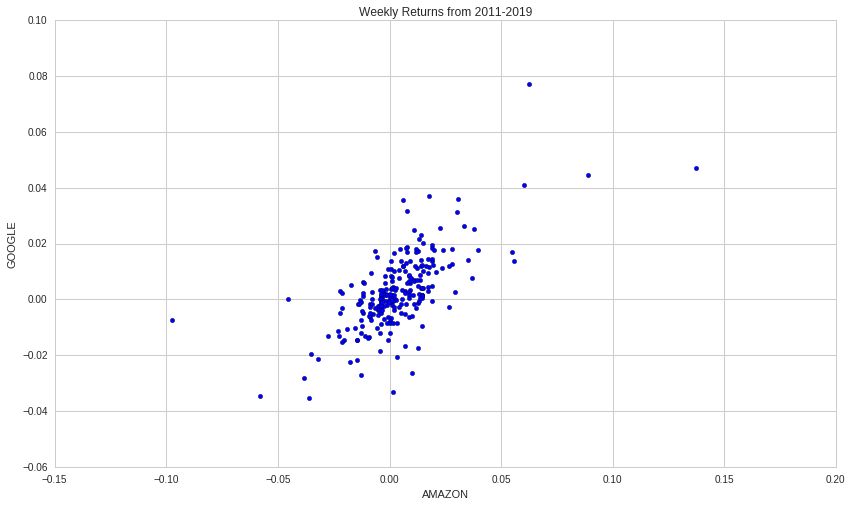

In [ ]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

start = '2011-01-01'
end = '2019-01-01'
data = get_pricing(['GOOG', 'AMZN'], fields='price', start_date=start, end_date=end)
data.resample('1W', closed='left', label='left').last()
data.columns = [e.symbol for e in data.columns]
data.head()

#get weekly data
x = 100 * (1 + np.random.normal(0,0.01,252).cumsum())
w = x[::5]  

R_msft = data['AMZN'].pct_change()[::5]
R_aapl = data['GOOG'].pct_change()[::5]

plt.scatter(R_msft, R_aapl)
plt.xlabel('AMAZON')
plt.ylabel('GOOGLE')
plt.title('Weekly Returns from 2011-2019');

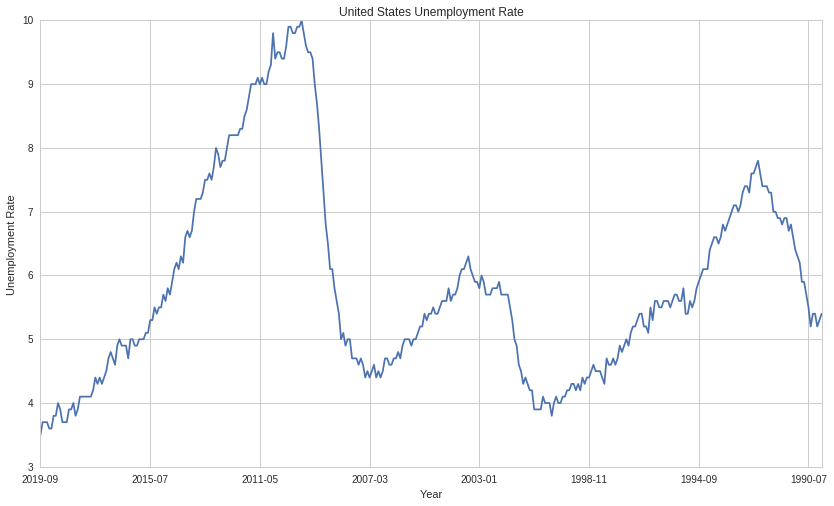

In [ ]:
#Plot the unemployement rate
unrate_df = unrate_df.loc[unrate_df['Date'] >= '1990-01']
unrate_df.plot(x='Date', y='Unemp_rate')
plt.xlabel("Year")
plt.ylabel("Unemployment Rate")
plt.title("United States Unemployment Rate")
plt.legend().set_visible(False)

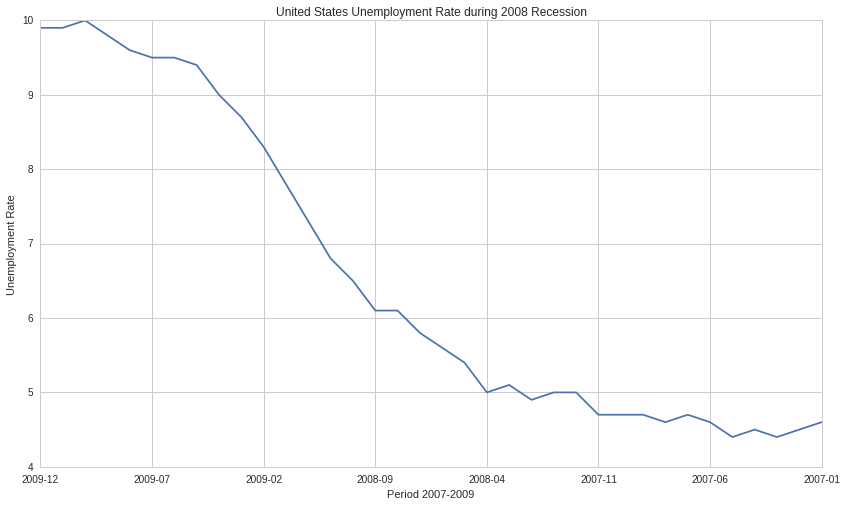

In [ ]:
#Check United States Unemployment Rate during 2008 Recession
unrate_df_lastRecession = unrate_df.loc[(unrate_df['Date'] >= '2007-01') & (unrate_df['Date'] <= '2009-12')]
unrate_df_lastRecession.plot(x='Date', y='Unemp_rate')
plt.xlabel("Period 2007-2009")
plt.ylabel("Unemployment Rate")
plt.title("United States Unemployment Rate during 2008 Recession")
plt.legend().set_visible(False)

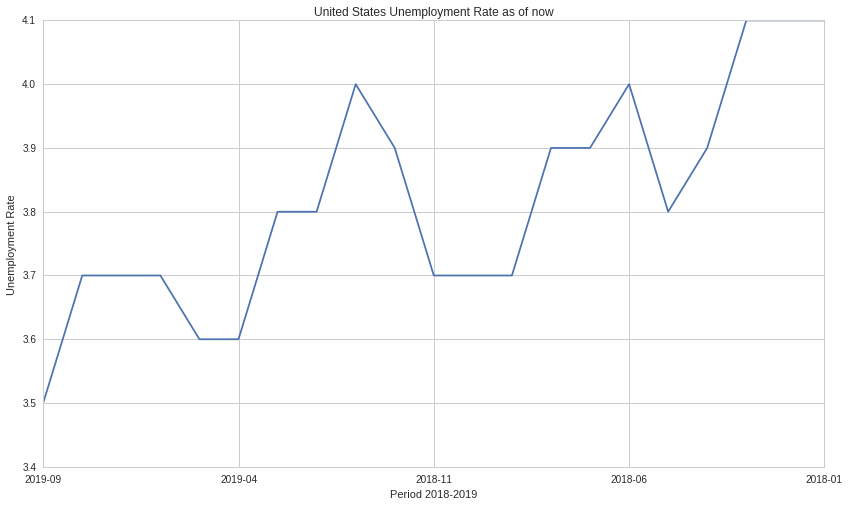

In [ ]:
#Unemployment rate for last 2 years
unrate_df_current = unrate_df.loc[unrate_df['Date'] >= '2018-01']
unrate_df_current.plot(x='Date', y='Unemp_rate')
plt.xlabel("Period 2018-2019")
plt.ylabel("Unemployment Rate")
plt.title("United States Unemployment Rate as of now")
plt.legend().set_visible(False)

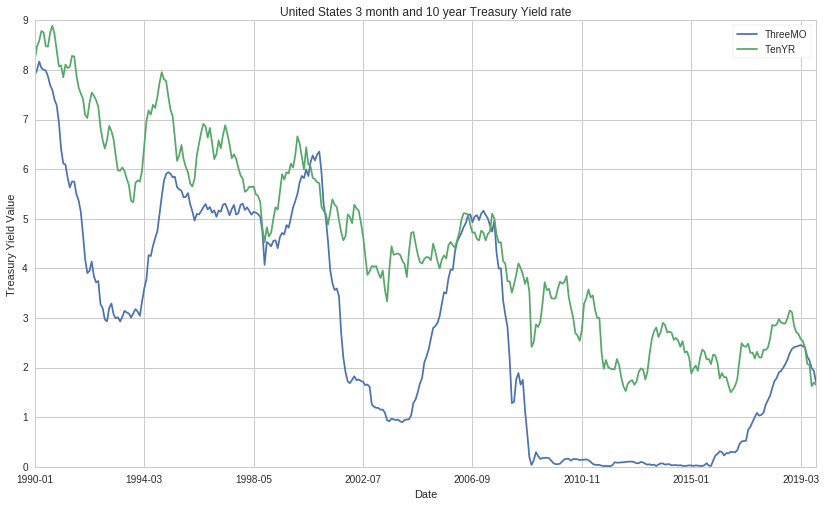

In [ ]:
#Plot yield rate of 3 month and 10 years Monthwise from 1990 tilldate
Yield_data.plot(x='Date', y=['ThreeMO','TenYR'])
plt.xlabel("Date")
plt.ylabel("Treasury Yield Value")
plt.title("United States 3 month and 10 year Treasury Yield rate")


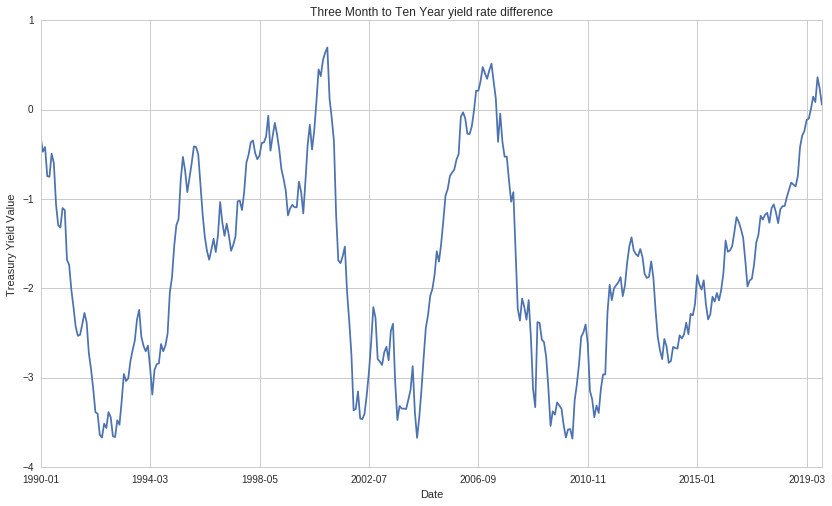

In [ ]:
#Plot of Three Month to Ten Year yield rate difference
Yield_data.plot(x='Date', y='3-10diff')
plt.xlabel("Date")
plt.ylabel("Treasury Yield Value")
plt.title("Three Month to Ten Year yield rate difference")
plt.legend().set_visible(False)

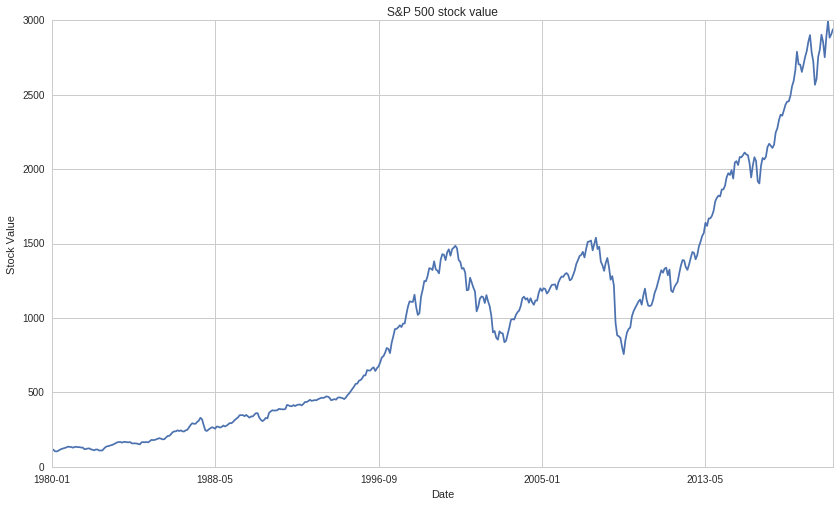

In [ ]:
#Plot stock data from 1990 tilldate
Stock_data.plot(x='Date', y='Stock_Value')
plt.xlabel("Date")
plt.ylabel("Stock Value")
plt.title("S&P 500 stock value")
plt.legend().set_visible(False)

# The Solution: implement a data science solution to the problem you are trying to solve.

Briefly describe the idea of your solution to the problem in the following cell:

In [ ]:
#We are using Logistic Regression to find probability of the occurance of Recession.
#Logitic Regression is as classification technique which enables us to find probability 
#of a sample to belong to a particular class. 
#These probabilities are then used for classification with a theshold value. For Binary classification, it's 0.5
#Here, we are training our model on data available from 1990 to 2006, and test recession on data from 2006 onwards.
#Thus, if probability comes out to be 0.5 or more, it's denotes that the probability of recession is more, and less otherwise.

Write codes to implement the solution in python:

In [ ]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

#Spliting data into Training and Testing set
X_train=Recession_parameters.loc[Recession_parameters['Date'] < '2006-01'][['3-10diff','Stock_Value']]
Y_train=Recession_parameters.loc[Recession_parameters['Date'] < '2006-01'][['Y_curve']]
X_test=Recession_parameters.loc[(Recession_parameters['Date'] >= '2006-01')][['3-10diff','Stock_Value']]
Y_test=Recession_parameters.loc[(Recession_parameters['Date'] >= '2006-01')][['Y_curve']]
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)





(192, 2)
(192, 1)
(166, 2)
(166, 1)


In [ ]:
#Using LogisticRegression scikit-learn library to train and make predictions on test data 
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
y_pred_logreg = logreg.predict(X_test)
y_prob_log = logreg.predict_proba(X_test)
print(y_pred_logreg)
#print(y_prob_log)

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
[[  7.81004447e-01   2.18995553e-01]
 [  7.53571731e-01   2.46428269e-01]
 [  7.89010949e-01   2.10989051e-01]
 [  8.63531137e-01   1.36468863e-01]
 [  8.65356326e-01   1.34643674e-01]
 [  8.32762811e-01   1.67237189e-01]
 [  7.43298214e-01   2.56701786e-01]
 [  5.92628228e-01   4.07371772e-01]
 [  5.93990693e-01   4.06009307e-01]
 [  5.13036916e-01   4.86963084e-01]
 [  3.91487039e-01   6.08512961e-01]
 [  4.42286875e-01   5.57713125e-01]
 [  4.89665669e-01   5.10334331e-01]
 [  4.17633570e-01   5.82366430e-01]
 [  3.64273061e-01   6.35726939e-01]
 [  5.13653789e-01   4.86346211e-01]
 [  6.53226242e-01   3.46773758e-01]
 [  8.91189460e-01   1.08810540e-

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:449: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Results: summarize and visualize the results discovered from the analysis

Please use figures, tables, or videos to communicate the results with the audience.


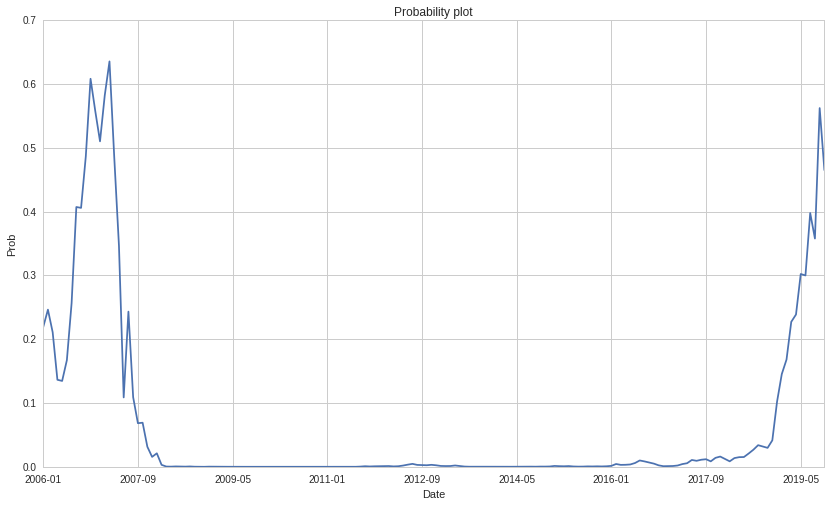

In [ ]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

Prediction=Recession_parameters.loc[(Recession_parameters['Date'] >= '2006-01')][['Date']]
Prediction["Prob"]=y_prob_log[:,1]
Prediction.plot(x='Date', y='Prob')
plt.xlabel("Date")
plt.ylabel("Prob")
plt.title("Probability plot")
plt.legend().set_visible(False)



# Done

All set! 

**What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "jupyter notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.

* **PPT Slides**: please prepare PPT slides to present about the case study . Each team present their case studies in class for 7 minutes.

Please compress all the files in a zipped file.


**How to submit:**

        Please submit through Canvas, in the Assignment "Case Study 2".
        
**Note: Each team only needs to submit one submission in Canvas**